#Versão Final - Projeto Agamotto 

# Conexão com Google e Captação de Dataset

1. Conexão com o Google Drive para captação dos Bancos de Dados utilizados para a predição

   1.1 Para isso você deverá possuir o ID da sua Base de Dados (que pode ser obtido clicando duas vezes no arquivo e captando a final da URL como indicado abaixo) 

   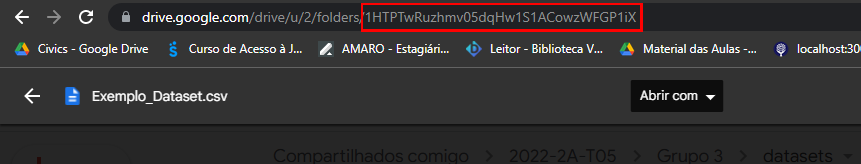

   

2. Download de Banco de Dados para Aplicação do Modelo 

3. Exemplo da Estrutura do Banco 

In [ ]:
from google.colab import drive, files
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Substitua o valor indicado após o "!gdown" pelo ID da sua Base de Dados 
!gdown 1YiE3zQzBoSANdVt05VP00gleFXEiruQg

Downloading...
From: https://drive.google.com/uc?id=1YiE3zQzBoSANdVt05VP00gleFXEiruQg
To: /content/BD.csv
100% 93.5M/93.5M [00:00<00:00, 171MB/s]


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd

tv_0 = pd.read_csv('/content/BD.csv')
tv_0.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Data,Hora Início,Emissora,Mês,Dia do Mês,Total Domicílios | Rat%,AB | Rat%,...,Categoria_SHOW,Categoria_SORTEIO,Categoria_TELE VENDAS,Dia da Semana_1,Dia da Semana_2,Dia da Semana_3,Dia da Semana_4,Dia da Semana_5,Dia da Semana_6,Dia da Semana_7
0,0,0,0,2020,6.00,tv_0,6,1,4.27,2.40,...,0,0,0,1,0,0,0,0,0,0
1,1,1,1,2020,6.00,tv_0,6,1,4.89,3.02,...,0,0,0,1,0,0,0,0,0,0
2,2,2,2,2020,6.00,tv_0,6,1,5.74,3.13,...,0,0,0,1,0,0,0,0,0,0
3,3,3,3,2020,6.25,tv_0,6,1,6.55,3.06,...,0,0,0,1,0,0,0,0,0,0
4,4,4,4,2020,6.25,tv_0,6,1,7.27,3.49,...,0,0,0,1,0,0,0,0,0,0


# Modelo de KNN 

##1. O que é: 

KNN Regressor é um método não paramétrico que faz aproximação entre variáveis independentes e os valores futuros fazendo uma média das observações mais próximas .
Esse modelo é usado tanto para regressão como classificação, porém ao utilizar um dataset com muitas variáveis independentes o modelo começa a se tornar muito lento. 

##2. Parâmetros Utilizados: 

k-neighbours = 2 

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from google.colab.data_table import DataTable
DataTable.max_columns = 120

# Dividindo x e y
# Determinando que x: Categorias de Programas e y: Valor do Rat por Domicilios 
x = tv_0[['Categoria_AUDITORIO',
       'Categoria_CARROS E MOTORES', 'Categoria_CULINARIO', 'Categoria_DEBATE',
       'Categoria_DOCUMENTARIO', 'Categoria_EDUCATIVO', 'Categoria_ENTREVISTA',
       'Categoria_ESPORTE', 'Categoria_FEMININO', 'Categoria_FILME',
       'Categoria_FUTEBOL', 'Categoria_GAME SHOW', 'Categoria_HUMORISTICO',
       'Categoria_JORNALISMO', 'Categoria_MINISSERIE', 'Categoria_MUSICAL',
       'Categoria_NAO CONSTA', 'Categoria_NOVELA', 'Categoria_OUTROS',
       'Categoria_POLITICO', 'Categoria_PREMIACAO', 'Categoria_REALITY SHOW',
       'Categoria_RELIGIOSO', 'Categoria_REPORTAGEM', 'Categoria_RURAL',
       'Categoria_SERIES', 'Categoria_SHOW', 'Categoria_SORTEIO',
       'Categoria_TELE VENDAS', 'Mês','Hora Início', 'Dia da Semana_1','Dia da Semana_2','Dia da Semana_3',
       'Dia da Semana_4','Dia da Semana_5','Dia da Semana_6','Dia da Semana_7', 'Dia do Mês', 'Data']]
y = tv_0[['Total Domicílios | Rat%']]


# Dividindo dados para treino e dados para teste
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size = 0.2, 
                                                    random_state = 1) # qualquer valor como semente do pseudo-random


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

#Instanciar e fazer o fit das variaveis com o modelo 
knn_model = KNeighborsRegressor(n_neighbors=2).fit(x_train, y_train)

#Calculando o score
score_knn = knn_model.score(x_test, y_test)

Avaliando a acurácia do modelo 

In [ ]:
#calculando a predição a partir do conjunto teste
y_pred_knn_test = knn_model.predict(x_test)

In [ ]:
print(f"R² (TESTE): {(metrics.r2_score(y_test, y_pred_knn_test) * 100):.2f}%") #R quadrado
print(f"Erro médio absoluto TESTE (MAE): {mean_absolute_error(y_test, y_pred_knn_test):.2f}") #erro médio absoluto
print(f"Erro médio quadrático TESTE (MSE): {mean_squared_error(y_test, y_pred_knn_test):.2f}") #erro médio quadrático

R² (TESTE): 98.14%
Erro médio absoluto TESTE (MAE): 0.59
Erro médio quadrático TESTE (MSE): 0.79


In [ ]:
#calculando a predição a partir do conjunto treino
y_pred_knn_train = knn_model.predict(x_train)

In [ ]:
print(f"R² (TREINO): {(metrics.r2_score(y_train, y_pred_knn_train) * 100):.2f}%") #R quadrado
print(f"Erro médio absoluto TREINO (MAE): {mean_absolute_error(y_train, y_pred_knn_train):.2f}") #erro médio absoluto
print(f"Erro médio quadrático TREINO (MSE): {mean_squared_error(y_train, y_pred_knn_train):.2f}") #erro médio quadrático

R² (TREINO): 99.32%
Erro médio absoluto TREINO (MAE): 0.36
Erro médio quadrático TREINO (MSE): 0.29


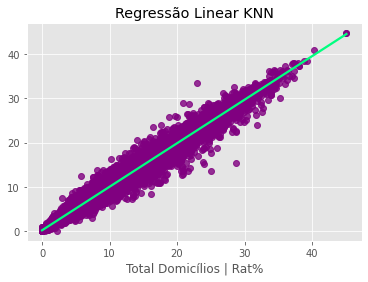

In [ ]:
#Distribuição das previsões
import seaborn as sns

graph_knn = sns.regplot(x=y_test, y=y_pred_knn_test, 
                 scatter_kws={"color": "purple"}, line_kws={"color": "springgreen"}).set_title("Regressão Linear KNN")

plt.show()

Text(0, 0.5, 'Itens ')

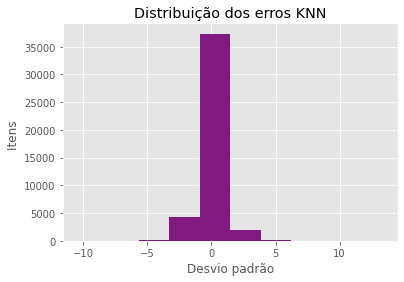

In [ ]:
y_normalizado3  = y_test.values.flatten()
y_pred_test_normal2 = y_pred_knn_test.flatten()
errors2 = (y_normalizado3 - y_pred_test_normal2)
plt.hist(errors2, color = (0.5,0.1,0.5))
plt.title("Distribuição dos erros KNN")
plt.xlabel('Desvio padrão')
plt.ylabel('Itens ')

In [ ]:
#Calculo do desvio padrão 

desvio2 = errors2.std()
print(f"O valor do desvio é: {desvio2:.2f}")

O valor do desvio é: 0.89


#Comparando predições com valores originais KNN




Nesta etapa, iremos comparar o resultado da predição de audiência total com o resultado da vida real.

Devido aos valores de r^2 gerados a partir de cada modelo, resolvemos testar com o Random Forest Regressor, visto que o mesmo possui um r^2 maior. 


### Testando com o KNN (4.4.3)

In [ ]:
#Escolhendo uma linha aleatoria do modelo de teste
testPredition = x_test.iloc[[2200]].values.flatten()

#Guardando esse números em uma variável 
testPredition

array([0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
       0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
       0.00e+00, 1.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
       0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
       0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 1.20e+01,
       9.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 1.00e+00, 0.00e+00,
       0.00e+00, 0.00e+00, 3.00e+00, 2.02e+03])

In [ ]:
#Testando o modelo com a linha selecionada acima
predition_knn = knn_model.predict([testPredition])

print(predition_knn)

[[5.445]]


In [ ]:
#Comparando o valor da predição com o valor real do RAT
y_test.iloc[[2200]]

,Total Domicílios | Rat%
53317,5.48


# Modelo de Random Forest Regressor

##1. O que é: 

Random Forest Regressor é um algoritmo que cria diversas árvores (fluxos) de decisão de forma aleatória e combina e compara os resultados delas para chegar em um resultado final do algoritmo. De maneira geral, esse algoritmo cria uma estrutura similar à uma árvore, onde os ramos são diferentes caminhos que o algoritmo segue para chegar em um valor previsto e em cada nó é verificada uma condição e, dependendo da resposta, o fluxo segue por um ramo específico. 


##2. Parâmetros Utilizados: 

n_estimators=301

In [ ]:
# Importando bibliotecas e treinando o modelo 
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


regressor = RandomForestRegressor(n_estimators=301, random_state=1)
regressor.fit (x_train, y_train)


RandomForestRegressor(n_estimators=301, random_state=1)

Executando o modelo

In [ ]:
#calculando predição a partir do conjunto teste 
y_pred_regressor_test = regressor.predict(x_test)
print(y_pred_regressor_test)

[ 2.73314887  4.99523477  3.11436877 ... 11.65826246  7.17841556
 25.9827129 ]


In [ ]:
print(f"R² (TESTE): {(metrics.r2_score(y_test, y_pred_regressor_test) * 100):.2f}%") #R quadrado
print(f"Erro médio absoluto TESTE (MAE): {mean_absolute_error(y_test, y_pred_regressor_test):.2f}") #erro médio absoluto
print(f"Erro médio quadrático TESTE (MSE): {mean_squared_error(y_test, y_pred_regressor_test):.2f}") #erro médio quadrático

R² (TESTE): 98.33%
Erro médio absoluto TESTE (MAE): 0.57
Erro médio quadrático TESTE (MSE): 0.71


In [ ]:
#calculando predição a partir do conjunto train
y_pred_regressor_train = regressor.predict(x_train)
print(y_pred_regressor_train)

[19.55122122 25.16911628  6.45409555 ...  7.98016568  3.9276832
 20.89137344]


In [ ]:
print(f"R² (TREINO): {(metrics.r2_score(y_train, y_pred_regressor_train) * 100):.2f}%") #R quadrado
print(f"Erro médio absoluto TREINO (MAE): {mean_absolute_error(y_train, y_pred_regressor_train):.2f}") #erro médio absoluto
print(f"Erro médio quadrático TREINO (MSE): {mean_squared_error(y_train, y_pred_regressor_train):.2f}") #erro médio quadrático

R² (TREINO): 99.43%
Erro médio absoluto TREINO (MAE): 0.34
Erro médio quadrático TREINO (MSE): 0.24


Text(0, 0.5, 'Itens ')

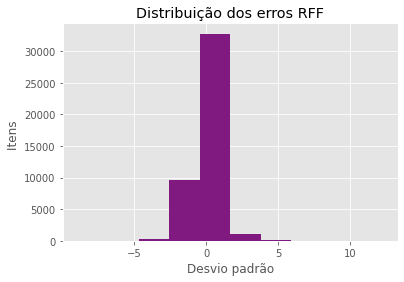

In [ ]:
#Calculando os erros do modelo e gerando um histograma dos erros
y_normalizado  = y_test.values.flatten()
errors = (y_normalizado - y_pred_regressor_test)
plt.hist(errors)
plt.hist(errors, color = (0.5,0.1,0.5))
plt.title("Distribuição dos erros RFF")
plt.xlabel('Desvio padrão')
plt.ylabel('Itens ')

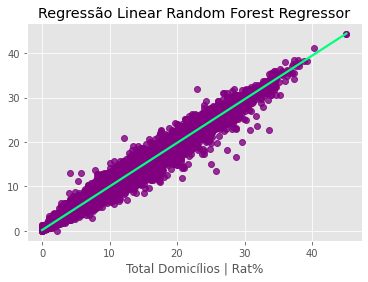

In [ ]:
#Distribuição das previsões 

graph_regressor = sns.regplot(x=y_test, y=y_pred_regressor_test, 
                 scatter_kws={"color": "purple"}, line_kws={"color": "springgreen"}).set_title("Regressão Linear Random Forest Regressor")

plt.show()

In [ ]:
#Desvio padrão dos erros do random forest generator 
desvio = errors.std()
print(f"O valor do desvio é: {desvio:.2f}")

O valor do desvio é: 0.84


# Modelo de LightGBM

##1. O que é: 

LGBM é uma estrutura de levantamento de gradiente rápida, distribuída e de alto desempenho que se baseia em um algoritmo de aprendizado de máquina popular - a árvore de decisão. Ele pode ser usado em classificação, regressão e muitas outras tarefas de aprendizado de máquina. Este algoritmo cresce em termos de folha e escolhe o valor delta máximo para crescer.


##2. Parâmetros Utilizados: 
    'task': 'train', #função
    'boosting_type': 'gbdt', #tipo da regressão (gbdt, rf, dart, goss)
    'objective': 'regression', #tipo do modelo
    'metric': ['l1','l2','rmse'], #erro médio quadrático e erro médio absoluto
    'learning_rate': 0.04, #velocidade do aprendizado
    'feature_fraction': 1, #porcentagem do dataframe a ser utilizado
    'verbose': 0, #usado para retirar possíveis bugs existentes (debug)
    "max_depth": 60, #limita o tamanho de cada árvore
    "num_leaves": 2048, #limita o número de folhas que cada árvore pode ter
    "num_iterations": 5_000, #quantidade de tentativas

In [ ]:
from sklearn import datasets
from sklearn import metrics
from sklearn.model_selection import train_test_split
from lightgbm.sklearn import LGBMRegressor
import lightgbm as lgb
from sklearn.multioutput import MultiOutputRegressor
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

plt.style.use('ggplot')

import lightgbm as ltb

In [ ]:
hyper_params = {
    'task': 'train', #função
    'boosting_type': 'gbdt', #tipo da regressão (gbdt, rf, dart, goss)
    'objective': 'regression', #tipo do modelo
    'metric': ['l1','l2','rmse'], #erro médio quadrático e erro médio absoluto
    'learning_rate': 0.04, #velocidade do aprendizado
    'feature_fraction': 1, #porcentagem do dataframe a ser utilizado
    'verbose': 0, #usado para retirar possíveis bugs existentes (debug)
    "max_depth": 60, #limita o tamanho de cada árvore
    "num_leaves": 2048, #limita o número de folhas que cada árvore pode ter
    "num_iterations": 5_000, #quantidade de tentativas
}

In [ ]:
import lightgbm as lgb
from sklearn.multioutput import MultiOutputRegressor
gbm = lgb.LGBMRegressor(**hyper_params)

gbm.fit(x_train, y_train,
        eval_set=[(x_test, y_test)],
        early_stopping_rounds=100,
        verbose=10)

Training until validation scores don't improve for 100 rounds.
[10]	valid_0's rmse: 4.52553	valid_0's l2: 20.4805	valid_0's l1: 3.61219
[20]	valid_0's rmse: 3.25137	valid_0's l2: 10.5714	valid_0's l1: 2.57994
[30]	valid_0's rmse: 2.45762	valid_0's l2: 6.03988	valid_0's l1: 1.92956
[40]	valid_0's rmse: 1.9725	valid_0's l2: 3.89074	valid_0's l1: 1.52988
[50]	valid_0's rmse: 1.6806	valid_0's l2: 2.82441	valid_0's l1: 1.28875
[60]	valid_0's rmse: 1.50017	valid_0's l2: 2.25052	valid_0's l1: 1.14051
[70]	valid_0's rmse: 1.37895	valid_0's l2: 1.9015	valid_0's l1: 1.04098
[80]	valid_0's rmse: 1.29439	valid_0's l2: 1.67544	valid_0's l1: 0.972488
[90]	valid_0's rmse: 1.23133	valid_0's l2: 1.51617	valid_0's l1: 0.921426
[100]	valid_0's rmse: 1.17803	valid_0's l2: 1.38775	valid_0's l1: 0.879456
[110]	valid_0's rmse: 1.13402	valid_0's l2: 1.28601	valid_0's l1: 0.845163
[120]	valid_0's rmse: 1.09985	valid_0's l2: 1.20967	valid_0's l1: 0.81857
[130]	valid_0's rmse: 1.07064	valid_0's l2: 1.14628	valid

LGBMRegressor(feature_fraction=1, learning_rate=0.04, max_depth=60,
              metric=['l1', 'l2', 'rmse'], num_iterations=5000, num_leaves=2048,
              objective='regression', task='train', verbose=0)

In [ ]:
#calculando predição a partir do conjunto treino 
y_pred_train = gbm.predict(x_train, num_iteration=gbm.best_iteration_)
print(y_pred_train)

[19.49044835 25.52336649  6.55674548 ...  7.95869433  3.8802115
 20.90379285]


In [ ]:
# Métricas de avaliação para valores de treino.

from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
print(f" R²: {(metrics.r2_score(y_train, y_pred_train) * 100):.2f}%") #R quadrado
print(f"Erro médio absoluto TREINO (MAE): {mean_absolute_error(y_train, y_pred_train):.2f}") #erro médio absoluto
print(f"Erro médio quadrático TREINO (MSE): {mean_squared_error(y_train, y_pred_train):.2f}") #erro médio quadrático

 R²: 99.43%
Erro médio absoluto TREINO (MAE): 0.35
Erro médio quadrático TREINO (MSE): 0.24


In [ ]:
y_pred_test = gbm.predict(x_test, num_iteration=gbm.best_iteration_)
print(y_pred_test)

[ 2.68924229  4.84856399  2.7859512  ... 11.60244845  7.11563349
 25.99411681]


In [ ]:
# Métricas de avaliação para valores de teste.

from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from math import sqrt
print(f" R² (TESTE): {(metrics.r2_score(y_test, y_pred_test) * 100):.2f}%") #R quadrado
print(f"Erro médio absoluto TESTE (MAE): {mean_absolute_error(y_test, y_pred_test):.2f}") #erro médio absoluto
print(f"Erro médio quadrático TESTE (MSE): {mean_squared_error(y_test, y_pred_test):.2f}") #erro médio quadrático

 R² (TESTE): 98.51%
Erro médio absoluto TESTE (MAE): 0.55
Erro médio quadrático TESTE (MSE): 0.63


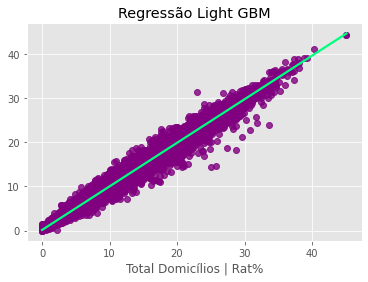

In [ ]:
graph_regressor = sns.regplot(x=y_test, y=y_pred_test, 
                 scatter_kws={"color": "purple"}, line_kws={"color": "springgreen"}).set_title("Regressão Light GBM")

plt.show()

Text(0, 0.5, 'Itens ')

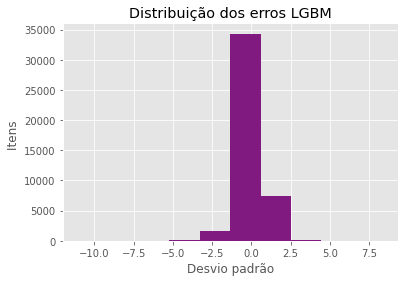

In [ ]:
y_normalizado3  = y_test.values.flatten()
y_pred_test_normal = y_pred_test.flatten()
errors3 = (y_pred_test_normal - y_normalizado3)
plt.hist(errors3, color = (0.5,0.1,0.5))
plt.title("Distribuição dos erros LGBM")
plt.xlabel('Desvio padrão')
plt.ylabel('Itens ')

In [ ]:
#Calculo do desvio padrão 

desvio3 = errors3.std()
print(f"O valor do desvio é: {desvio3:.2f}")

O valor do desvio é: 0.79


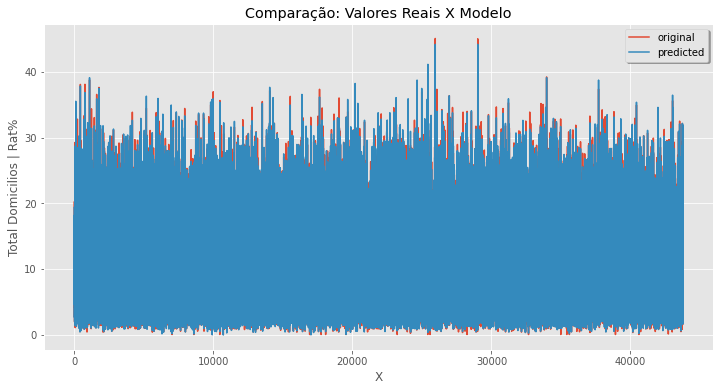

In [ ]:
x_ax = range(len(y_test))
plt.figure(figsize=(12, 6))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, y_pred_test, label="predicted")
plt.title("Comparação: Valores Reais X Modelo")
plt.xlabel('X')
plt.ylabel('Total Domicilios | Rat%')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()  

# Input dos Dados 

Nessa seção você poderá inserir as variáveis utilizadas para podermos definir os valores de entrada para a simulação do nosso Modelo de Predição.

In [ ]:
from datetime import date
from datetime import datetime
import numpy as np


Categoria = 'Categoria_ESPORTE' #@param ["Categoria_AUDITORIO", "Categoria_CARROS E MOTORES", "Categoria_CULINARIO", "Categoria_DEBATE","Categoria_DOCUMENTARIO","Categoria_EDUCATIVO", "Categoria_ENTREVISTA", "Categoria_ESPORTE", "Categoria_FEMININO","Categoria_FILME", "Categoria_FUTEBOL","Categoria_GAME SHOW","Categoria_HUMORISTICO","Categoria_JORNALISMO", "Categoria_MINISSERIE", "Categoria_MUSICAL","Categoria_NOVELA", "Categoria_OUTROS", "Categoria_POLITICO", "Categoria_PREMIACAO","Categoria_REALITY SHOW","Categoria_RELIGIOSO", "Categoria_REPORTAGEM", "Categoria_RURAL", "Categoria_SERIES","Categoria_SHOW", "Categoria_SORTEIO", "Categoria_TELE VENDAS"]
Dia_da_semana = 'Quarta' #@param ['Segunda','Terça','Quarta','Quinta','Sexta','Sábado','Domingo']
Dia_do_Mês = "2022-09-27" #@param {type:"date"}
Hora = '10' #@param ['6', '7', '8', '9', '10', '11', '12', '13', '14', '15','16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29']
Minuto = '15' #@param ['00', '15', '30','45']

In [ ]:
Categorias = ['Categoria_AUDITORIO',
       'Categoria_CARROS E MOTORES', 'Categoria_CULINARIO', 'Categoria_DEBATE',
       'Categoria_DOCUMENTARIO', 'Categoria_EDUCATIVO', 'Categoria_ENTREVISTA',
       'Categoria_ESPORTE', 'Categoria_FEMININO', 'Categoria_FILME',
       'Categoria_FUTEBOL', 'Categoria_GAME SHOW', 'Categoria_HUMORISTICO',
       'Categoria_JORNALISMO', 'Categoria_MINISSERIE', 'Categoria_MUSICAL', 
       'Categoria_NAO CONSTA','Categoria_NOVELA', 'Categoria_OUTROS',
       'Categoria_POLITICO', 'Categoria_PREMIACAO', 'Categoria_REALITY SHOW',
       'Categoria_RELIGIOSO', 'Categoria_REPORTAGEM', 'Categoria_RURAL',
       'Categoria_SERIES', 'Categoria_SHOW', 'Categoria_SORTEIO',
       'Categoria_TELE VENDAS']

Dia_sem = ['Dia da Semana_1','Dia da Semana_2','Dia da Semana_3',
       'Dia da Semana_4','Dia da Semana_5','Dia da Semana_6','Dia da Semana_7']



In [ ]:
Categorias =[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
if Categoria == 'Categoria_AUDITORIO':
  Categorias[0] = 1
elif Categoria == 'Categoria_CARROS E MOTORES':
  Categorias[1] = 1
elif Categoria == 'Categoria_CULINARIO':
  Categorias[2] = 1
elif Categoria ==  'Categoria_DEBATE' :
  Categorias[3] = 1
elif Categoria == 'Categoria_DOCUMENTARIO':
  Categorias[4] = 1
elif Categoria ==  'Categoria_EDUCATIVO':
  Categorias[5] = 1
elif Categoria ==  'Categoria_ENTREVISTA':
  Categorias[6] = 1
elif Categoria ==  'Categoria_ESPORTE':
  Categorias[7] = 1
elif Categoria == 'Categoria_FEMININO':
  Categorias[8] = 1
elif Categoria == 'Categoria_FILME':
  Categorias[9] = 1
elif Categoria == 'Categoria_FUTEBOL':
  Categorias[10] = 1
elif Categoria ==  'Categoria_GAME SHOW':
  Categorias[11] = 1
elif Categoria == 'Categoria_HUMORISTICO':
  Categorias[12] = 1
elif Categoria == 'Categoria_JORNALISMO':
  Categorias[13] = 1
elif Categoria == 'Categoria_MINISSERIE':
  Categorias[14] = 1
elif Categoria == 'Categoria_MUSICAL':
  Categorias[15] = 1
elif Categoria == 'Categoria_NOVELA':
  Categorias[17] = 1
elif Categoria == 'Categoria_OUTROS':
  Categorias[18] = 1
elif Categoria == 'Categoria_POLITICO':
  Categorias[19] = 1
elif Categoria ==  'Categoria_PREMIACAO':
  Categorias[20] = 1
elif Categoria ==  'Categoria_REALITY SHOW':
  Categorias[21] = 1
elif Categoria == 'Categoria_RELIGIOSO':
  Categorias[22] = 1
elif Categoria == 'Categoria_REPORTAGEM':
  Categorias[23] = 1
elif Categoria == 'Categoria_RURAL':
  Categorias[24] = 1
elif Categoria == 'Categoria_SERIES':
  Categorias[25] = 1
elif Categoria == 'Categoria_SHOW':
  Categorias[26] = 1
elif Categoria == 'Categoria_SORTEIO':
  Categorias[27] = 1
elif Categoria == 'Categoria_TELE VENDAS':
  Categorias[28] = 1

In [ ]:
Dia_sem = [0, 0, 0, 0, 0, 0, 0]
if Dia_da_semana == 'Segunda':
  Dia_sem[0] = 1
elif Dia_da_semana == 'Terça':
  Dia_sem[1] = 2
elif Dia_da_semana == 'Quarta':
  Dia_sem[2] = 3
elif Dia_da_semana == 'Quinta':
  Dia_sem[3] = 4
elif Dia_da_semana == 'Sexta':
  Dia_sem[4] = 5
elif Dia_da_semana == 'Sábado':
  Dia_sem[5] = 6
elif Dia_da_semana == 'Domingo':
  Dia_sem[6] = 7

In [ ]:
#Pega a data selecionada e sepera os valores de ano, mês e dia. 
ymd = Dia_do_Mês.split('-')

year = int(ymd[0])
lyear = [int(ymd[0])]
month = int(ymd[1])
lmonth = [int(ymd[1])]
day = int(ymd[2])
lday = [int(ymd[2])]

In [ ]:
if Minuto == '15':
  min = 0.25
if Minuto == '30':
  min = 0.5
if Minuto == '45':
  min = 0.75
  
tempo = [(min + int(Hora))]

In [ ]:
#retr = [Categorias, month, tempo, Dia_sem, day, year]
result = Categorias + lmonth + tempo + Dia_sem + lday + lyear
arrv = []
arrv.append(result)

Testando a predição com base nos diferentes modelos


In [ ]:
#Predição LGBM
y_pred_test = gbm.predict(arrv, num_iteration=gbm.best_iteration_)
y_pred_test

array([5.72427771])

In [ ]:
#Predição Random Forest Regressor 
y_pred_regressor = regressor.predict(arrv)
y_pred_regressor

array([5.86529505])

In [ ]:
#Predição KNN 
y_pred_knn = knn_model.predict(arrv)
y_pred_knn

array([[6.745]])

# Teste de Predição

## Comparando acurácia dos modelos 

In [ ]:
import random
import warnings

warnings.filterwarnings("ignore")

random_list = [random.randint(1,43776) for p in range(0,300)]
print(random_list)


#Resultados KNN 
predict_values_knn= []
real_values_knn = []

#Resultados RFR 
predict_values_rfr= []
real_values_rfr = []

#Resultados LGBM
predict_values_lgbm= []
real_values_lgbm = []

[41259, 19502, 27453, 29770, 30750, 38212, 22893, 1150, 27536, 14830, 36379, 37015, 34158, 19064, 6458, 21176, 20954, 25914, 26086, 1999, 30110, 9145, 43209, 38700, 33364, 3327, 20906, 33632, 5597, 33250, 29927, 41584, 6344, 4006, 41982, 11650, 41288, 16860, 42206, 12469, 33807, 29863, 43151, 3663, 11395, 18304, 21687, 38298, 219, 9550, 38991, 35208, 21279, 28410, 11013, 37801, 4872, 10795, 2369, 30826, 36008, 4268, 35210, 32912, 13769, 9103, 2142, 25013, 38256, 30583, 1622, 22036, 19440, 28330, 23108, 15068, 40413, 10555, 8938, 22680, 21545, 28287, 9228, 26516, 26895, 19081, 42923, 33983, 4034, 22015, 37677, 13893, 7299, 12121, 1862, 16907, 17378, 16199, 19500, 17923, 18418, 35284, 25906, 13816, 5915, 30074, 1048, 32840, 20589, 19805, 13498, 24509, 17548, 4725, 24336, 28785, 38598, 15681, 43001, 34306, 41446, 20935, 30281, 18997, 36894, 27694, 2872, 21196, 33093, 34879, 1720, 25035, 36324, 36041, 41961, 36048, 9116, 5899, 42702, 22749, 24458, 13251, 6221, 42389, 36001, 29824, 1742, 36

Separando os dados para preparar a amostra 

In [ ]:
#Valores da coluna x_test
values_xTest = []
#Valores do RAT real
values_real = []

for x in random_list:
        values_x = x_test.iloc[[x]].values.flatten()
        values_xTest.append(values_x)
        values_y = y_test.iloc[[x]].values.flatten()
        values_real.append(values_y)

In [ ]:
#Valores preditos pelo KNN
values_knn = []

for element in values_xTest:
    predition_KNN = knn_model.predict([element])
    values_knn.append(predition_KNN)

In [ ]:
#Valores preditos pelo RFF
values_rff = []

for element in values_xTest:
    predition_RFF = regressor.predict([element])
    values_rff.append(predition_RFF)

In [ ]:
#Valores preditos LGBM 
values_lgbm = []

for element in values_xTest:
    predition_LGBM = gbm.predict([element], num_iteration=gbm.best_iteration_)
    values_lgbm.append(predition_LGBM)

In [ ]:
#Removendo colchetes de cada item das listas 
values_lgbm = [i[0] for i in values_lgbm]
values_rff = [i[0] for i in values_rff]
values_knn_2 = [x[0] for x in values_knn]
values_real = [i[0] for i in values_real]
values_knn_22 = [y[0] for y in values_knn_2]

In [ ]:
dados_dict = {'Valores reais' : values_real, 
              'Valores LGBM' : values_lgbm,
              'Valores KNN': values_knn_22,
              'Valores RFF': values_rff
              }
dados_totais = pd.DataFrame (data = dados_dict)
dados_totais.head(10)

,Valores reais,Valores LGBM,Valores KNN,Valores RFF
0,12.62,11.637742,11.710,11.371247
1,2.23,2.588830,2.740,2.595100
2,3.69,3.899883,3.915,3.945635
3,14.83,14.413065,14.700,14.143236
4,7.88,8.031560,7.730,7.800368
5,6.35,6.165652,6.885,6.038638
6,3.46,4.073557,3.570,4.854305
7,10.29,10.746854,10.600,10.669084
8,10.70,12.039801,14.365,15.710101
9,6.90,6.603142,6.465,6.572677


In [ ]:
dataframe_modelos = dados_totais.to_csv("dados_totais.csv", index = False)
files.download('dados_totais.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Calculando as métricas para escolher o melhor modelo 

In [ ]:
#LIGHT GBM 
lgbm_error = dados_totais['Valores reais'] - dados_totais['Valores LGBM'] 
knn_error = dados_totais['Valores reais'] - dados_totais['Valores KNN'] 
rff_error = dados_totais['Valores reais'] - dados_totais['Valores RFF'] 

error_lgbm_sum = lgbm_error.sum
error_knn_sum = knn_error.sum
error_rfr_sum = rff_error.sum

print('Erro do LGBM', error_lgbm_sum)
print('Erro do knn', error_knn_sum)
print('Erro do rff', error_rfr_sum)

Erro do LGBM <bound method NDFrame._add_numeric_operations.<locals>.sum of 0      0.982258
1     -0.358830
2     -0.209883
3      0.416935
4     -0.151560
         ...   
295    0.061711
296   -0.099822
297   -0.276509
298   -1.928435
299    0.562245
Length: 300, dtype: float64>
Erro do knn <bound method NDFrame._add_numeric_operations.<locals>.sum of 0      0.910
1     -0.510
2     -0.225
3      0.130
4      0.150
       ...  
295   -0.715
296   -0.130
297   -0.395
298   -0.785
299    0.170
Length: 300, dtype: float64>
Erro do rff <bound method NDFrame._add_numeric_operations.<locals>.sum of 0      1.248753
1     -0.365100
2     -0.255635
3      0.686764
4      0.079632
         ...   
295   -0.018499
296   -0.282931
297   -0.185626
298   -1.787819
299   -0.307626
Length: 300, dtype: float64>


## Modelo - Random Forest Regressor


In [ ]:
print("Real:", predict_values_knn)

Real: []


In [ ]:
for i in random_list:
    #Escolhendo uma linha aleatoria do modelo de teste e guardando esse números em uma variável 
    testPreditionKNN = x_test.iloc[[i]].values.flatten()
    
    #Testando o modelo com a linha selecionada acima
    predition_knn = knn_model.predict([testPreditionKNN])
    predict_values_knn.append(predition_knn)

    #Comparando o valor da predição com o valor real do RAT
    real = y_test.iloc[[i]]
    real_values_knn.append(real)

print("Predição:", predict_values_knn)
print("Real:", real_values_knn)

Predição: [array([[11.71]]), array([[2.74]]), array([[3.915]]), array([[14.7]]), array([[7.73]]), array([[6.885]]), array([[3.57]]), array([[10.6]]), array([[14.365]]), array([[6.465]]), array([[22.58]]), array([[4.835]]), array([[9.39]]), array([[2.655]]), array([[17.455]]), array([[5.57]]), array([[12.405]]), array([[10.355]]), array([[3.1]]), array([[5.235]]), array([[1.12]]), array([[11.84]]), array([[10.5]]), array([[3.505]]), array([[1.19]]), array([[3.59]]), array([[20.19]]), array([[4.13]]), array([[0.84]]), array([[16.44]]), array([[7.05]]), array([[13.25]]), array([[14.455]]), array([[8.965]]), array([[8.76]]), array([[9.675]]), array([[6.52]]), array([[3.565]]), array([[4.95]]), array([[5.475]]), array([[6.18]]), array([[8.525]]), array([[17.435]]), array([[23.49]]), array([[12.09]]), array([[4.19]]), array([[2.015]]), array([[14.55]]), array([[6.97]]), array([[7.3]]), array([[20.175]]), array([[8.805]]), array([[16.085]]), array([[19.735]]), array([[23.27]]), array([[7.155]

In [ ]:
for i in random_list:
    #Escolhendo uma linha aleatoria do modelo de teste e guardando esse números em uma variável 
    testPreditionRFR = x_test.iloc[[i]].values.flatten()

    #Testando o modelo com a linha selecionada acima
    predition_RFR = regressor.predict([testPreditionRFR])
    predict_values_rfr.append(predition_RFR)

    #Comparando o valor da predição com o valor real do RAT
    real = y_test.iloc[[i]]
    real_values_rfr.append(real)

print("Predição:", predict_values_rfr)
#print("Real:", real_values_rfr)

Predição: [array([11.37124695]), array([2.59509998]), array([3.94563495]), array([14.14323596]), array([7.80036766]), array([6.03863843]), array([4.85430505]), array([10.66908361]), array([15.71010078]), array([6.57267667]), array([21.33592791]), array([4.83402492]), array([9.29449504]), array([2.63452065]), array([17.75384694]), array([5.7644875]), array([12.59035343]), array([10.15463542]), array([3.1442714]), array([5.23599834]), array([1.13966145]), array([12.82387225]), array([10.63409956]), array([3.54135627]), array([1.19437431]), array([2.7137555]), array([19.83460979]), array([4.10073074]), array([1.02538214]), array([15.81061047]), array([7.27722536]), array([13.44991307]), array([14.50650455]), array([8.85642833]), array([8.89998837]), array([9.74404983]), array([6.52290666]), array([3.33014681]), array([5.05066857]), array([5.44578769]), array([6.19464091]), array([8.44887763]), array([17.15565607]), array([22.81249632]), array([12.26982661]), array([4.22886885]), array([1.

## Modelo - LightGBM


In [ ]:
for i in random_list:
    #Escolhendo uma linha aleatoria do modelo de teste e guardando esse números em uma variável
    testPreditionLgbm = x_test.iloc[[i]].values.flatten()

    #Testando o modelo com a linha selecionada acima
    predition_lgbm = gbm.predict([testPreditionLgbm], num_iteration=gbm.best_iteration_)
    predict_values_lgbm.append(predition_lgbm)

    #Comparando o valor da predição com o valor real do RAT
    real = y_test.iloc[[i]]
    real_values_lgbm.append(real)

print("Predição:", predict_values_lgbm)
print("Real:", real_values_lgbm)

Predição: [array([11.63774153]), array([2.58883022]), array([3.89988262]), array([14.41306456]), array([8.03155974]), array([6.16565192]), array([4.07355683]), array([10.74685369]), array([12.0398011]), array([6.60314213]), array([21.3586278]), array([4.89223705]), array([9.33653368]), array([2.59395638]), array([17.77193974]), array([5.76585936]), array([12.51686728]), array([10.53782615]), array([3.08375456]), array([5.20515766]), array([1.24595697]), array([12.89776109]), array([10.86622383]), array([3.62384948]), array([1.09736874]), array([2.99091859]), array([19.88784935]), array([4.18319374]), array([0.90143623]), array([15.59160135]), array([7.3901091]), array([13.35966315]), array([14.35775821]), array([8.7946611]), array([8.79409841]), array([9.89587446]), array([6.58625472]), array([3.31465814]), array([4.8731564]), array([5.51320608]), array([6.46789484]), array([8.33331718]), array([16.8104862]), array([23.06819949]), array([12.08642683]), array([4.31819328]), array([1.872

Criando um dataframe com todas as prediçoes do modelo 


In [ ]:
val_lgbm = predict_values_lgbm

In [ ]:
teste_frame = pd.DataFrame({'col':predict_values_rfr , 
                            'Change':predict_values_lgbm })